<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [635]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [636]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [637]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2007,s2008,Movie,Enissa Amani: Ehrenwort,Max Amini,Enissa Amani,Germany,"April 26, 2018",2018,TV-MA,66 min,Stand-Up Comedy,"Live from Hamburg, Iranian-German comedian Eni..."
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",2016,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
4204,s4205,TV Show,Monthly Girls' Nozaki Kun,NaN,"Yuichi Nakamura, Ari Ozawa, Nobuhiko Okamoto, ...",Japan,"May 1, 2020",2014,TV-PG,1 Season,"Anime Series, Romantic TV Shows",Art imitates life when Chiyo discovers her cru...
2499,s2500,Movie,Goosebumps 2: Haunted Halloween,Ari Sandel,"Jeremy Ray Taylor, Madison Iseman, Caleel Harr...","United States, United Kingdom","April 25, 2019",2018,PG,90 min,"Children & Family Movies, Comedies",Three teens spend their Halloween trying to st...
2619,s2620,Movie,Har Kisse Ke Hisse: Kaamyaab,Hardik Mehta,"Sanjay Mishra, Deepak Dobriyal, Sarika Singh, ...",India,"May 2, 2020",2020,TV-14,105 min,"Dramas, International Movies","After a career of thankless credits, a retired..."


In [666]:
df['type'].value_counts()

type
0    5372
1    2398
Name: count, dtype: int64

In [638]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Missing Data Handling

In [639]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [640]:
df.duplicated().sum()

0

In [641]:
# Fill Missing Values with high count by 'No Data'
df['director'] = df['director'].replace(np.nan, 'No Data')
df['cast'] = df['cast'].replace(np.nan, 'No Data')

# # Fill Missing Values with Mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

# # Drops Missing Values (missing values with low count)
df.dropna(inplace=True)

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


### Data preprocessing

In [643]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['listed_in'] = df['listed_in'].str.lower().str.replace(r",|movies|tv|shows|language"
, '', regex=True)
df['listed_in'] = df['listed_in'].str.replace('sci-fi & fantasy', 'scifi')
df['listed_in'] = df['listed_in'].str.replace('stand-up comedy', 'comedy')
df['listed_in'] = df['listed_in'].str.replace('comedies', 'comedy')
df['listed_in'] = df['listed_in'].str.replace('anime features', 'anime')


listed_in = vectorizer.fit_transform(df['listed_in'])
vectorizer.get_feature_names_out()
# print(len(listed_in.toarray()))
df_tmp = pd.DataFrame(listed_in.toarray() ,columns=vectorizer.get_feature_names_out())
df_tmp['title'] = df['title'].values

In [644]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international dramas scifi,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror international,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,action & adventure independent scifi,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,dramas,A brilliant group of students become card-coun...


In [645]:
# label encoding

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical")
df.head()

All features are now numerical


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,1,81,2714,3153,39,206,2020,8,147,402,3905
1,1111,0,123,1839,1586,308,390,2016,8,209,351,1388
2,2217,0,66,1288,6188,379,377,2011,5,190,377,7155
3,3321,0,125,3444,1785,549,1207,2009,4,194,86,3929
4,4431,0,59,3175,2917,549,583,2008,4,30,335,138


In [646]:
#Creating a copy of data
ds = df.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['show_id', 'date_added', 'description']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
scaled_ds.head()

All features are now scaled


,type,title,director,cast,country,release_year,rating,duration,listed_in
0,1.496730,-1.695716,0.443306,-0.196858,-2.041874,0.692007,0.492431,0.631505,1.060784
1,-0.668123,-1.676991,-0.415150,-1.016300,-0.505402,0.235584,0.492431,1.350633,0.644605
2,-0.668123,-1.702403,-0.955731,1.390255,-0.099864,-0.334945,-1.051632,1.130255,0.856775
3,-0.668123,-1.676099,1.159503,-0.912235,0.871140,-0.563157,-1.566319,1.176651,-1.517890
4,-0.668123,-1.705524,0.895589,-0.320271,0.871140,-0.677263,-1.566319,-0.725559,0.514040


### PCA Application

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [647]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)

PCA(n_components=3)

In [648]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(['col1', 'col2', 'col3']))
PCA_ds.describe().T
# 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10'

,count,mean,std,min,25%,50%,75%,max
col1,7770.0,-6.584180e-17,1.347739,-5.580505,-0.920037,-0.180099,1.049715,3.202030
col2,7770.0,-2.926302e-17,1.080086,-7.772888,-0.625328,0.036334,0.736450,2.997154
col3,7770.0,5.852604e-17,1.026978,-3.058675,-0.713602,-0.005523,0.716151,3.047777


In [649]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.2017962608390409
Explained variance of PC2 0.12960397387994024
Explained variance of PC2 0.11717205561542599


In [650]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=ds.columns)
loading_matrix

,PC1,PC2,PC3
type,0.785319,-0.225370,-0.152751
title,0.045432,-0.253741,0.526970
director,0.415999,-0.441900,-0.265775
cast,0.046200,-0.083770,0.558668
country,-0.119092,-0.159331,-0.491694
release_year,0.424754,0.611729,-0.078078
rating,0.566811,0.385866,-0.096128
duration,-0.549799,0.462595,-0.123702
listed_in,0.451961,0.294334,0.313857


2. Create a scree plot for each principal component

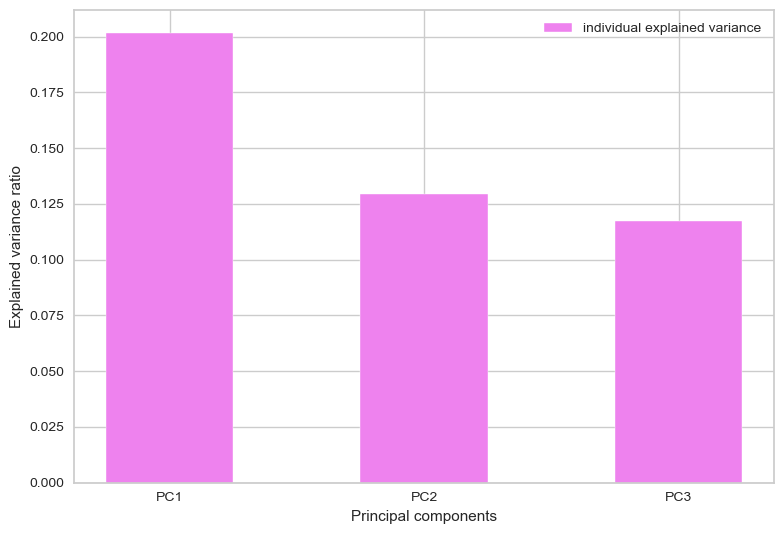

In [651]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

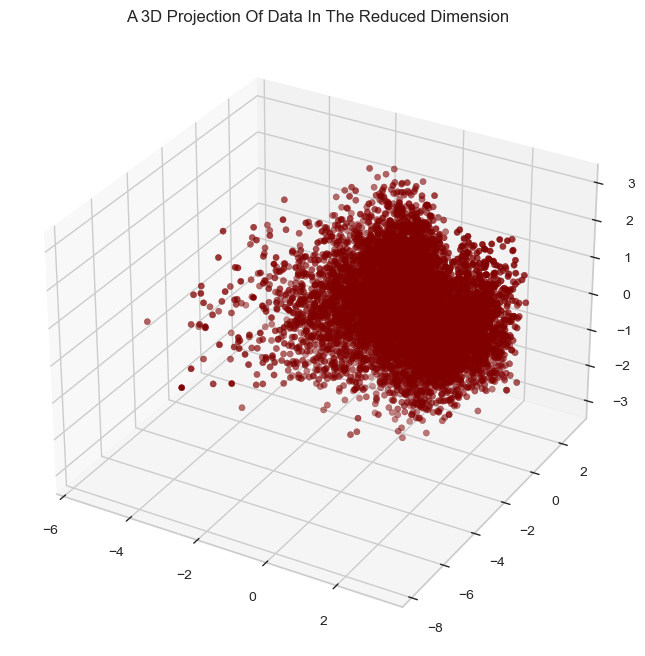

In [652]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


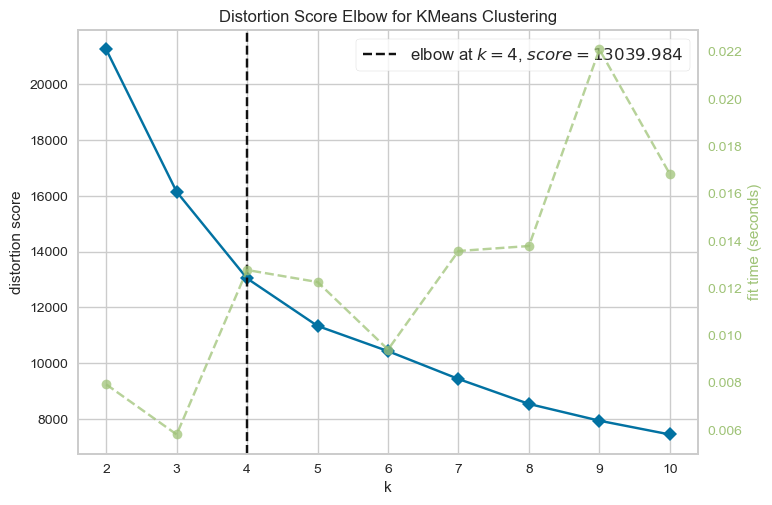

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [653]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [660]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
y_kmeans = kmeans.fit(PCA_ds)
PCA_ds["Clusters"] = y_kmeans.labels_
df["Clusters"]= y_kmeans.labels_

print(f"The inertia score is : {kmeans.inertia_}")
silhouette_avg = silhouette_score(PCA_ds, kmeans.labels_)
print(f"The average silhouette score is : {silhouette_avg}")

The inertia score is : 16657.638464772634
The average silhouette score is : 0.31495185758653055


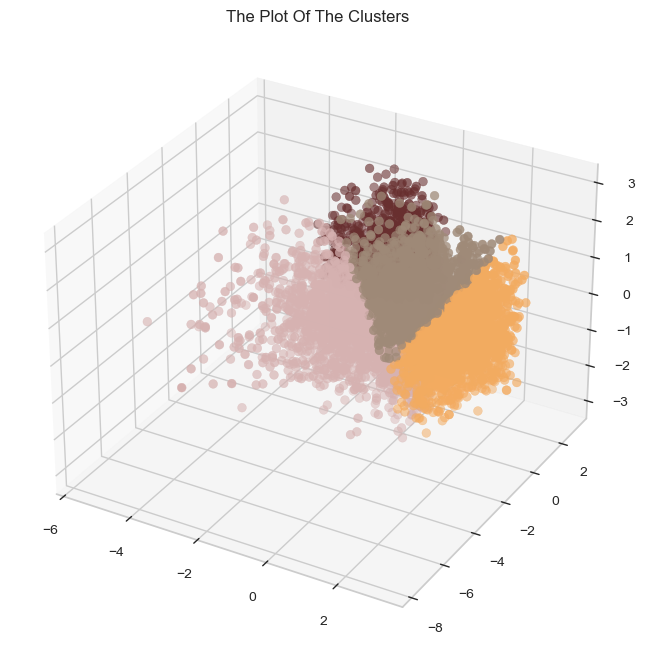

In [661]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

4. Profile each cluster that you have generated based on your experiments

C:\Users\carla\AppData\Local\Temp\ipykernel_12360\1434342898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters"], palette= pal)


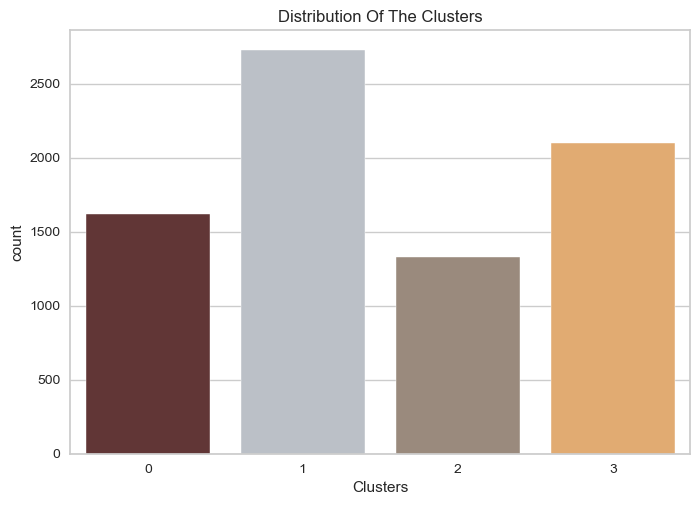

In [662]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Column: type


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


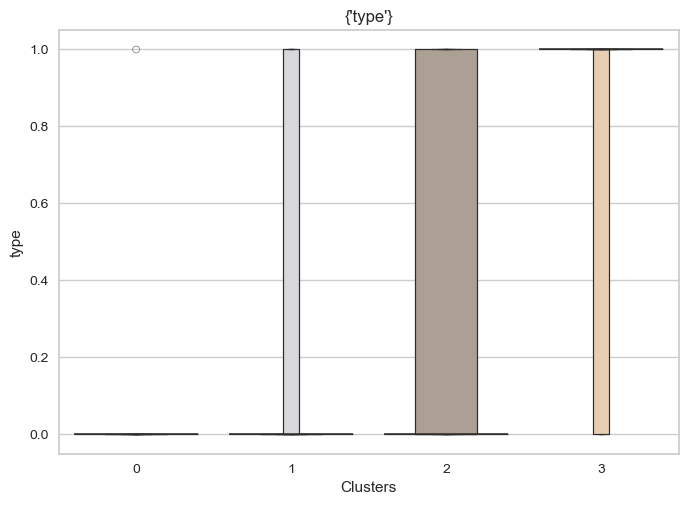

Column: title


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


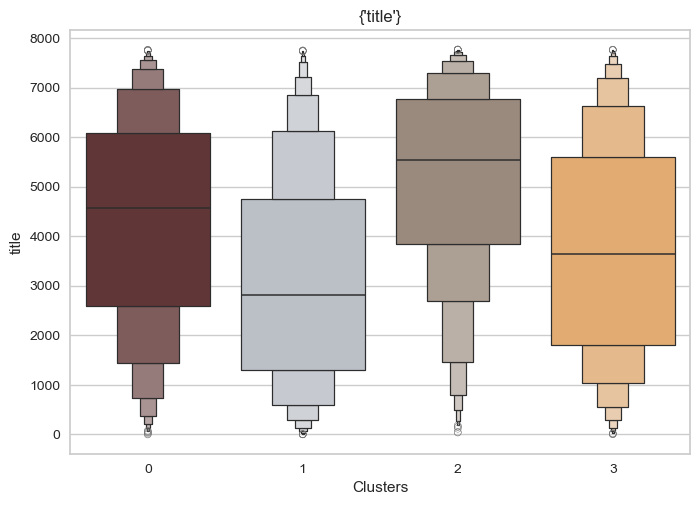

Column: director


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


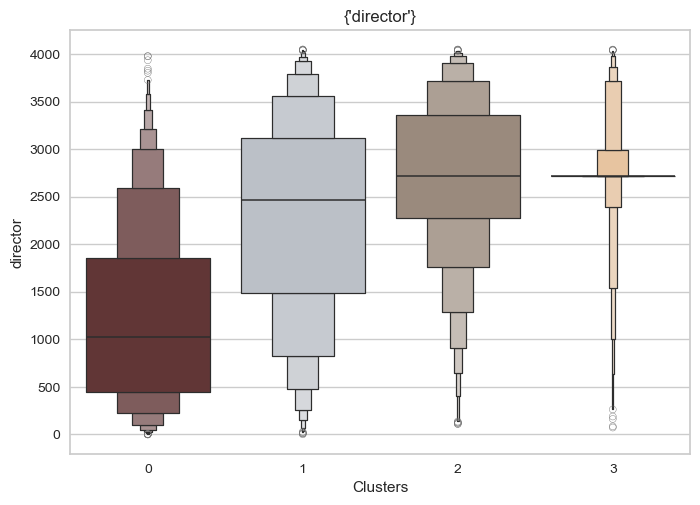

Column: cast


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


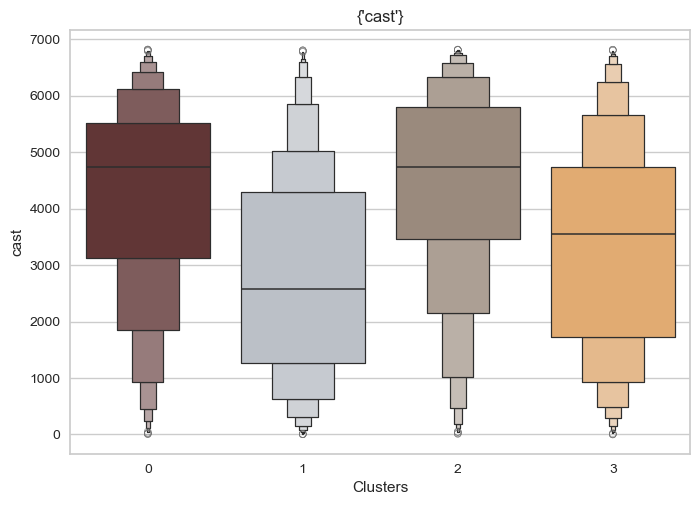

C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


Column: country


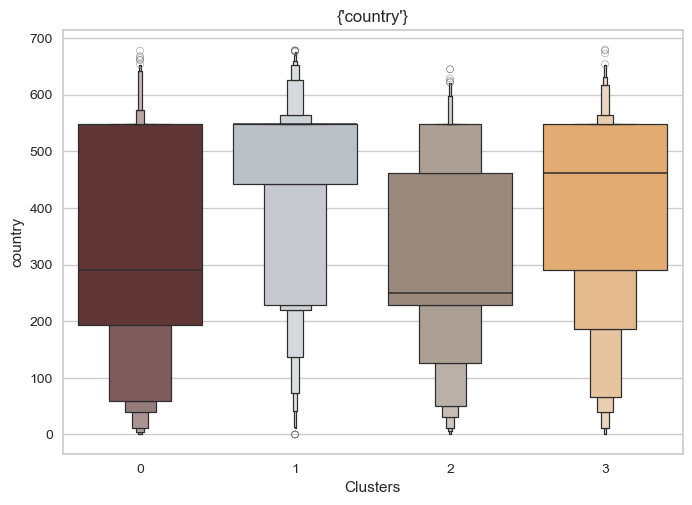

Column: release_year


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


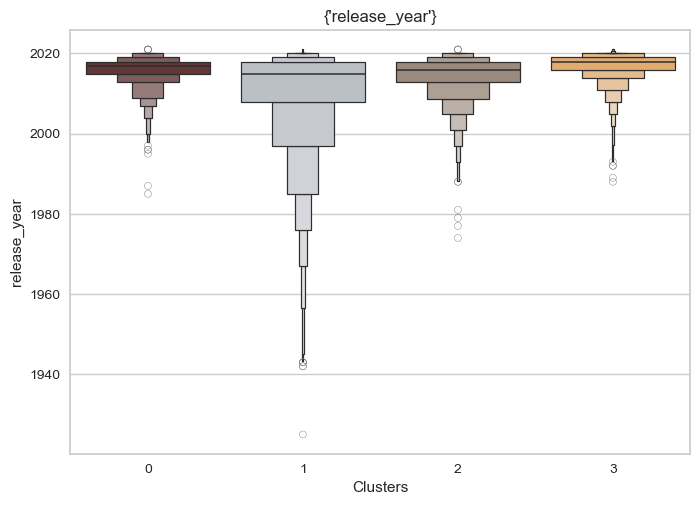

Column: rating


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


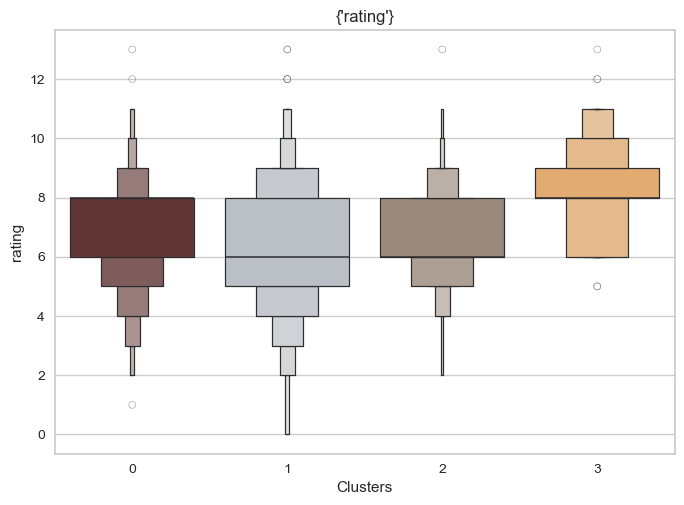

Column: duration


C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


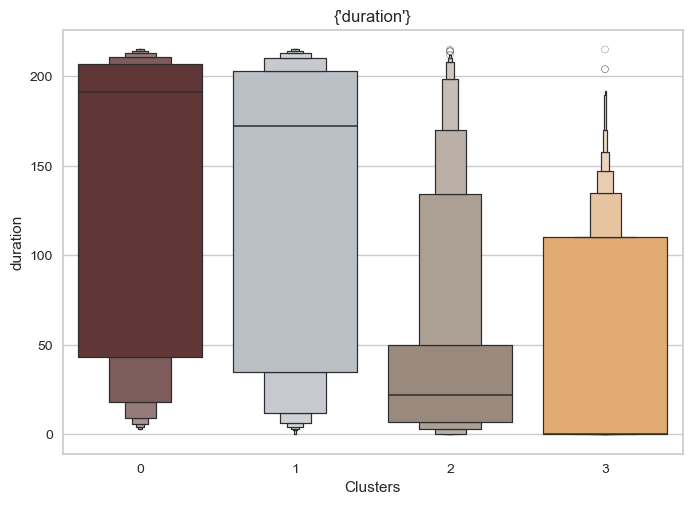

C:\Users\carla\AppData\Local\Temp\ipykernel_12360\263302752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


Column: listed_in


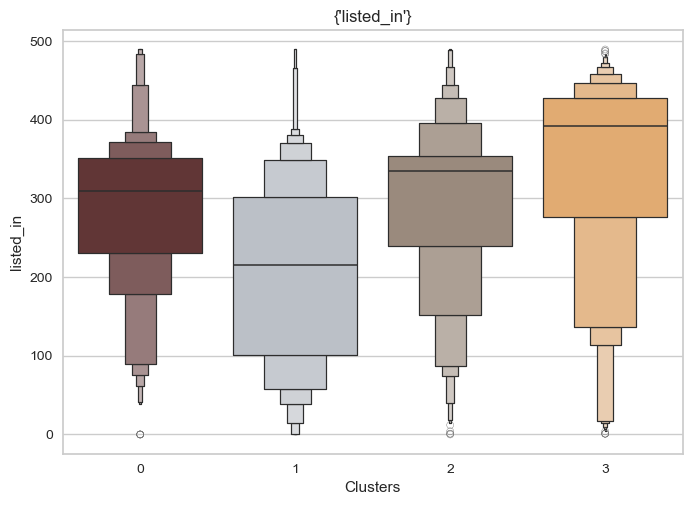

In [663]:
# prompt: for loop of each column in the ds

for col in ds.columns:
  print(f"Column: {col}")
  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
  pl.set_title({col})
  plt.show()


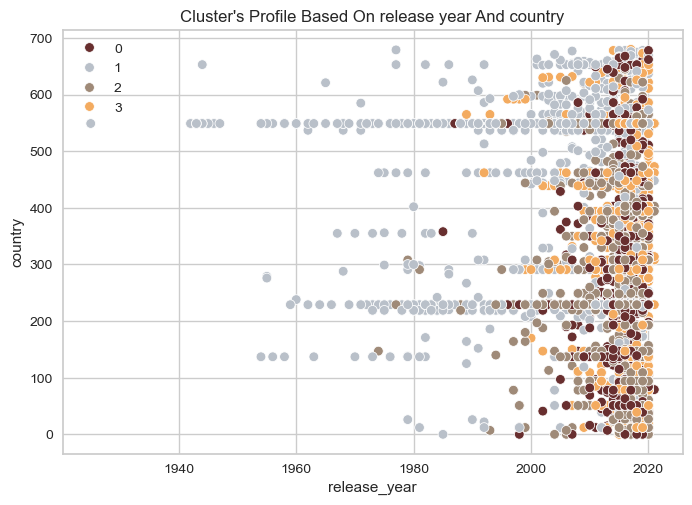

In [664]:
pl = sns.scatterplot(data = df,x=df["release_year"], y=df["country"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On release year And country")
plt.legend()
plt.show()

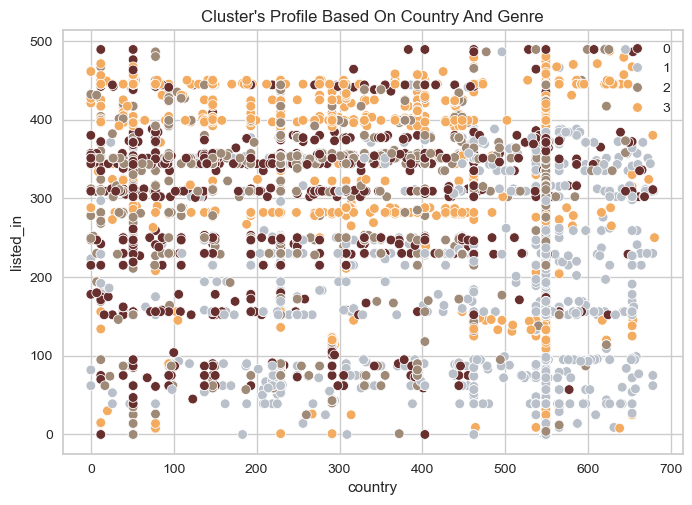

In [665]:
pl = sns.scatterplot(data = df,x=df["country"], y=df["listed_in"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Country And Genre")
plt.legend()
plt.show()

## Summary

Cluster 0
    These are the movies/shows that was released on new generation with the same type, and the majority of the movies/shows have the same rating same as the their genres

Cluster 1
    These are movies with various types, and was release in early year, but the majority of it was release in new generation

Cluster 2
    These are movies with high number of movies/shows with the same type, low duration compare to other clusters and has the same genres with cluster 0

Cluster 3
    The movies that is also released in new generation with almost their genres are the same, and with a wide range if genres